In [1]:
import pandas as pd

constructors_df = pd.read_csv('constructors.csv')

drivers_df = pd.read_csv( 'drivers.csv')

races = pd.read_csv( 'races.csv')

results_df = pd.read_csv( 'results.csv')

In [2]:
pd.get_option("display.max_columns",None)
print(results_df)

       resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
26075     26081    1110       817            213      3    19       16   
26076     26082    1110       858              3      2    18       17   
26077     26083    1110       807            210     27     0       18   
26078     26084    1110       832              6     55     4       \N   
26079     26085    1110       857              1     81     5       \N   

      positionText  positionOrder  points  laps         time milliseconds  \
0                1              1 

In [3]:
print(results_df.columns)

race_df = races[["raceId", "year", "round", "circuitId"]].copy()

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')


In [4]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

In [5]:
print("Driver result of a race")
print(results_df.head())

print("Race_df dataframe")
print(race_df.head())

Driver result of a race
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300       

In [6]:
race_df = race_df.sort_values(by=['year', 'round'])

race_df = race_df[race_df["year"] >= 1982]

print(race_df)

      raceId  year  round  circuitId
466      467  1982      1         30
467      468  1982      2         36
468      469  1982      3         43
469      470  1982      4         21
470      471  1982      5         40
...      ...   ...    ...        ...
1096    1116  2023     18         69
1097    1117  2023     19         32
1098    1118  2023     20         18
1099    1119  2023     21         80
1100    1120  2023     22         24

[744 rows x 4 columns]


In [7]:
res_df = results_df[['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder','points' , 'laps' ,'fastestLap','position','rank']].copy()
print(res_df)
duplicates = race_df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")
print(race_df)

       raceId  driverId  constructorId  grid  positionOrder  points  laps  \
0          18         1              1     1              1    10.0    58   
1          18         2              2     5              2     8.0    58   
2          18         3              3     7              3     6.0    58   
3          18         4              4    11              4     5.0    58   
4          18         5              1     3              5     4.0    58   
...       ...       ...            ...   ...            ...     ...   ...   
26075    1110       817            213    19             16     0.0    44   
26076    1110       858              3    18             17     0.0    44   
26077    1110       807            210     0             18     0.0    44   
26078    1110       832              6     4             19     0.0    23   
26079    1110       857              1     5             20     0.0     0   

      fastestLap position rank  
0             39        1    2  
1        

In [8]:
df = pd.merge(race_df, res_df, on='raceId')
print(df)

       raceId  year  round  circuitId  driverId  constructorId  grid  \
0         467  1982      1         30       117              4     5   
1         467  1982      1         30       199              3     8   
2         467  1982      1         30       163              4     1   
3         467  1982      1         30       182              1    13   
4         467  1982      1         30       177              3     7   
...       ...   ...    ...        ...       ...            ...   ...   
17316    1110  2023     12         13       817            213    19   
17317    1110  2023     12         13       858              3    18   
17318    1110  2023     12         13       807            210     0   
17319    1110  2023     12         13       832              6     4   
17320    1110  2023     12         13       857              1     5   

       positionOrder  points  laps fastestLap position rank  
0                  1     9.0    77         \N        1   \N  
1          

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
raceId,17321.0,477.446510,349.475072,1.0,206.0,364.0,881.0,1110.0
year,17321.0,2001.829687,12.253518,1982.0,1991.0,2001.0,2013.0,2023.0
round,17321.0,9.240517,5.183158,1.0,5.0,9.0,13.0,22.0
circuitId,17321.0,19.726863,17.794540,1.0,8.0,14.0,25.0,79.0
driverId,17321.0,225.175914,307.095663,1.0,23.0,94.0,173.0,858.0
constructorId,17321.0,35.653426,55.326192,1.0,6.0,17.0,33.0,214.0
grid,17321.0,11.281508,7.041134,0.0,5.0,11.0,17.0,29.0
positionOrder,17321.0,12.716009,7.606928,1.0,6.0,12.0,18.0,39.0
points,17321.0,2.363576,4.873451,0.0,0.0,0.0,2.0,50.0
laps,17321.0,46.205473,23.795401,0.0,30.0,53.0,65.0,87.0


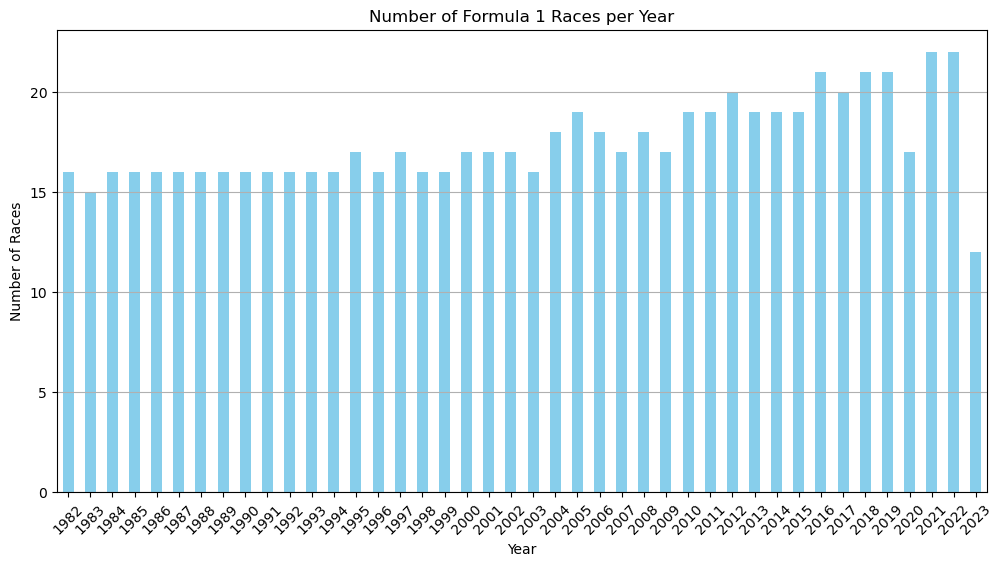

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Group data by 'year' and count the number of races
races_per_year = df.groupby('year')['raceId'].nunique()

# Create a bar plot
plt.figure(figsize=(12, 6))  # You can adjust the size as per your preference
races_per_year.plot(kind='bar', color='skyblue')

plt.title('Number of Formula 1 Races per Year')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.grid(axis='y')

# Display the plot
plt.show()

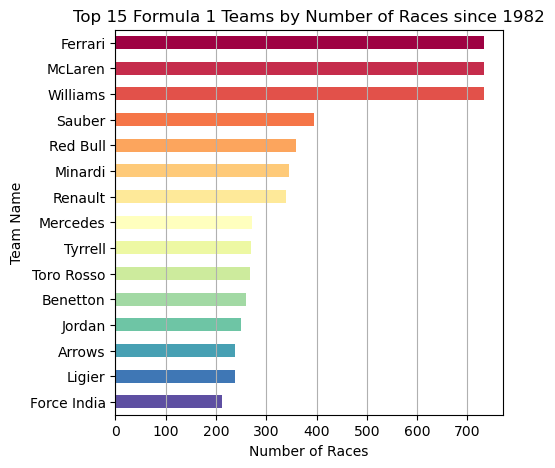

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by 'constructorId' and count unique races
races_per_team = df.groupby('constructorId')['raceId'].nunique()

# Create a dictionary to map 'constructorId' to 'name'
constructor_name_dict = pd.Series(constructors_df.name.values, index=constructors_df.constructorId).to_dict()

# Replace 'constructorId' with corresponding 'name' in races_per_team
races_per_team.index = races_per_team.index.map(constructor_name_dict)

# Sort the data from most races to least races and select top 15
races_per_team_sorted = races_per_team.sort_values(ascending=False).head(15)

# Create a bar plot
plt.figure(figsize=(5,5))  # Adjust the figure size to your preference
colors = plt.cm.Spectral(np.linspace(0, 1, len(races_per_team_sorted))) # Using Spectral colormap
races_per_team_sorted.plot(kind='barh', color=colors)

plt.title('Top 15 Formula 1 Teams by Number of Races since 1982')
plt.ylabel('Team Name')
plt.xlabel('Number of Races')
plt.grid(axis='x')

# Reverse the order of the y-axis so the team with most races is on top
plt.gca().invert_yaxis()

# Display the plot
plt.show()


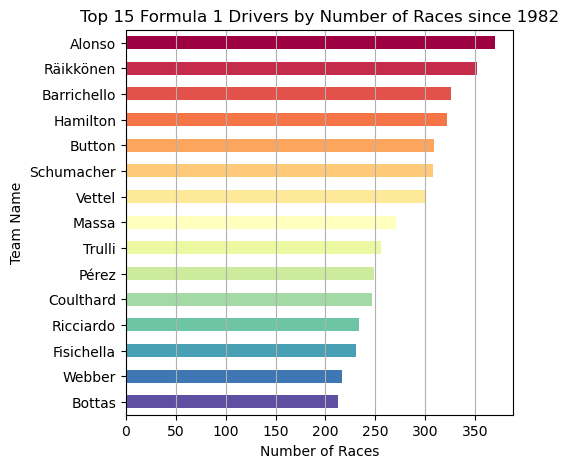

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by 'driverId' and count unique races
races_per_team = df.groupby('driverId')['raceId'].nunique()

# Create a dictionary to map 'driverId' to 'name'
driver_name_dict = pd.Series(drivers_df.surname.values, index=drivers_df.driverId).to_dict()

# Replace 'driverId' with corresponding 'name' in races_per_team
races_per_team.index = races_per_team.index.map(driver_name_dict)

# Sort the data from most races to least races and select top 15
races_per_team_sorted = races_per_team.sort_values(ascending=False).head(15)

# Create a bar plot
plt.figure(figsize=(5, 5))  # Adjust the figure size to your preference
colors = plt.cm.Spectral(np.linspace(0, 1, len(races_per_team_sorted))) # Using Spectral colormap
races_per_team_sorted.plot(kind='barh', color=colors)

plt.title('Top 15 Formula 1 Drivers by Number of Races since 1982')
plt.ylabel('Team Name')
plt.xlabel('Number of Races')
plt.grid(axis='x')

# Reverse the order of the y-axis so the team with most races is on top
plt.gca().invert_yaxis()

# Display the plot
plt.show()

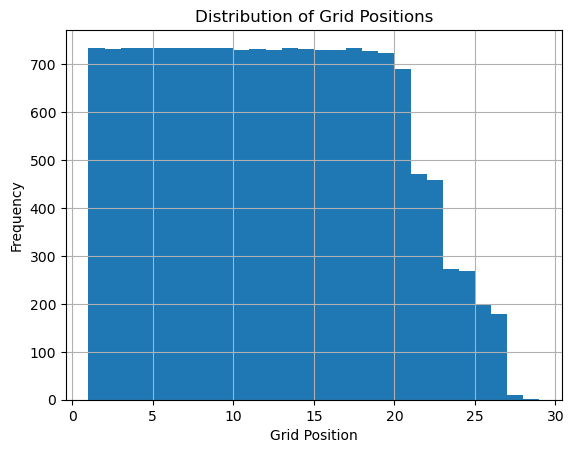

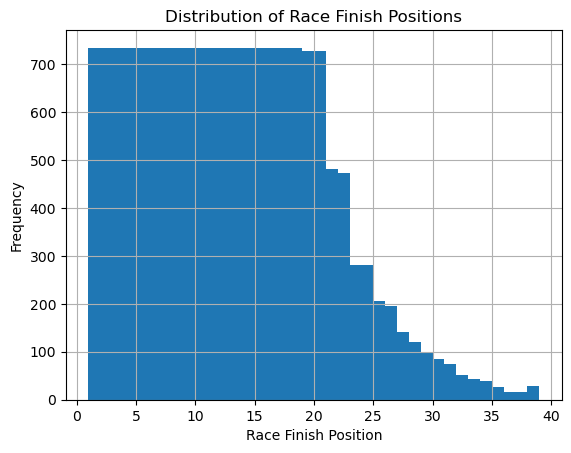

In [13]:
# Histogram of grid positions
df_nonZero = df[df['grid']!=0]
df_nonZero['grid'].hist(bins=28)
plt.title('Distribution of Grid Positions')
plt.xlabel('Grid Position')
plt.ylabel('Frequency')
plt.show()

# Histogram of positionOrder
df['positionOrder'].hist(bins=38)
plt.title('Distribution of Race Finish Positions')
plt.xlabel('Race Finish Position')
plt.ylabel('Frequency')
plt.show()


In [14]:
df['rank'] = df.groupby('raceId')['positionOrder'].rank(method='min')

In [15]:
encoder = LabelEncoder()
df['constructorId'] = encoder.fit_transform(df['constructorId'])
df['driverId'] = encoder.fit_transform(df['driverId'])

In [16]:
import numpy as np
from sklearn.impute import SimpleImputer

# Replace \N with NaN in fastestLap
df['fastestLap'] = df['fastestLap'].replace('\\N', np.nan)

# Impute missing values in fastestLap with mean
imputer = SimpleImputer(strategy='mean')
df['fastestLap'] = imputer.fit_transform(df[['fastestLap']])

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['positionOrder', 'grid', 'laps', 'points', 'rank', 'fastestLap']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Select features and target
X = df[['grid', 'laps', 'points', 'rank', 'fastestLap', 'constructorId', 'driverId']]
y = df['position']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression

# # Define parameter grids for each model
# param_grid_decision_tree = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# param_grid_random_forest = {
#     'n_estimators': [50, 100],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'bootstrap': [True, False]
# }

# param_grid_svc = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }

# param_grid_logistic_regression = {
#     'C': [0.1, 1, 10],
#     'penalty': ['l1', 'l2']
# }

# # Define list of models to try
# models = [
#     ('Decision Tree', DecisionTreeClassifier(random_state=42), param_grid_decision_tree),
#     ('Random Forest', RandomForestClassifier(random_state=42), param_grid_random_forest),
#     ('SVM', SVC(random_state=42), param_grid_svc),
#     ('Logistic Regression', LogisticRegression(random_state=42, max_iter=1000), param_grid_logistic_regression)
# ]

# # Iterate over models and perform grid search
# for model_name, model, param_grid in models:
#     print(f"### {model_name} ###")
    
#     # Setup GridSearchCV
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
    
#     # Execute grid search
#     grid_search.fit(X_train, y_train)
    
#     # Print best parameters and best score
#     print("Best parameters found: ", grid_search.best_params_)
#     print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
    
#     # Use the best estimator to predict on test data
#     best_model = grid_search.best_estimator_
#     accuracy = best_model.score(X_test, y_test)
#     print(f"Model accuracy on test set: {accuracy}")
#     print()


Model accuracy on test set: 0.9448773448773449


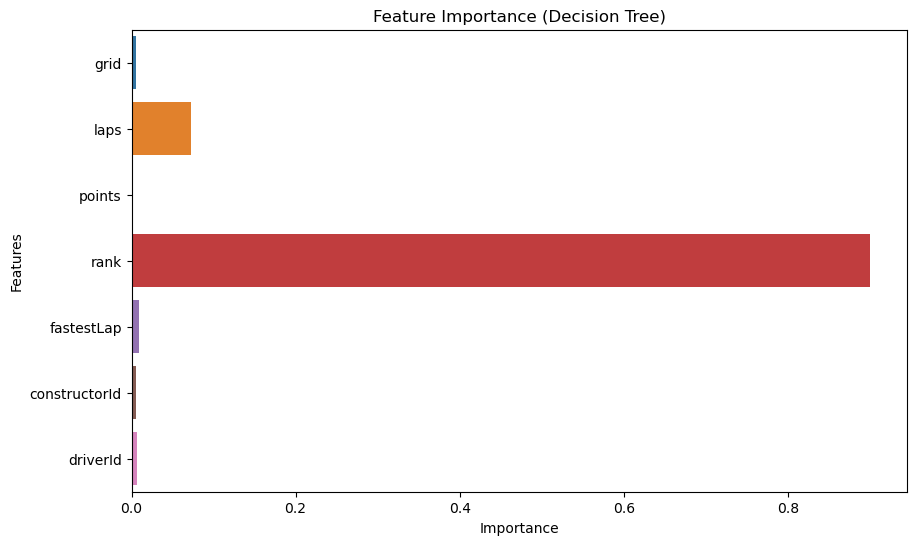

In [18]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Example model (using DecisionTreeClassifier)
model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=4, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Evaluate model performance on test set
accuracy = model.score(X_test, y_test)
print(f"Model accuracy on test set: {accuracy}")

# Predictions
y_pred = model.predict(X_test)

# Optional: Visualize feature importance
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fit the model (assuming `model` is already defined)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Model accuracy: 0.9448773448773449
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       137
          10       0.93      0.98      0.96       132
          11       0.92      0.96      0.94       138
          12       0.86      0.96      0.90       114
          13       0.90      0.93      0.91        96
          14       0.84      0.93      0.88        94
          15       0.89      0.87      0.88        84
          16       0.86      0.84      0.85        57
          17       0.82      0.91      0.86        54
          18       0.72      0.88      0.79        33
          19       0.71      0.86      0.77        14
           2       0.99      1.00      1.00       142
          20       0.75      0.69      0.72        13
          21       0.88      0.78      0.82         9
          22       0.29      0.67      0.40         3
          23       0.00      0.00      0.00         3
           3       1.00

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:

features = ['grid', 'laps', 'points', 'rank', 'fastestLap', 'constructorId', 'driverId']

# Assuming df contains all necessary features for all driverIds
X_all = df[features]

# Get all unique driverIds in sorted order
all_driver_ids = sorted(df['driverId'])

# Predict 'position' for all driverIds
predictions = []

for driver_id in all_driver_ids:
    # Filter data for the current driverId
    X_driver = X_all[X_all['driverId'] == driver_id]
    
    # Use best_model to predict 'position' for the current driverId
    if not X_driver.empty:
        predicted_position = model.predict(X_driver.iloc[0:1])  # Assuming only one row per driverId
        predictions.append(predicted_position[0])
    else:
        predictions.append(None)  # Handle cases where data for driverId is missing

# Combine driverId with predictions
results = pd.DataFrame({
    'driverId': all_driver_ids,
    'predicted_position': predictions
})

print(results)


       driverId predicted_position
0             0                  3
1             0                  3
2             0                  3
3             0                  3
4             0                  3
...         ...                ...
17316       261                 12
17317       261                 12
17318       261                 12
17319       261                 12
17320       261                 12

[17321 rows x 2 columns]


C:\Users\prana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


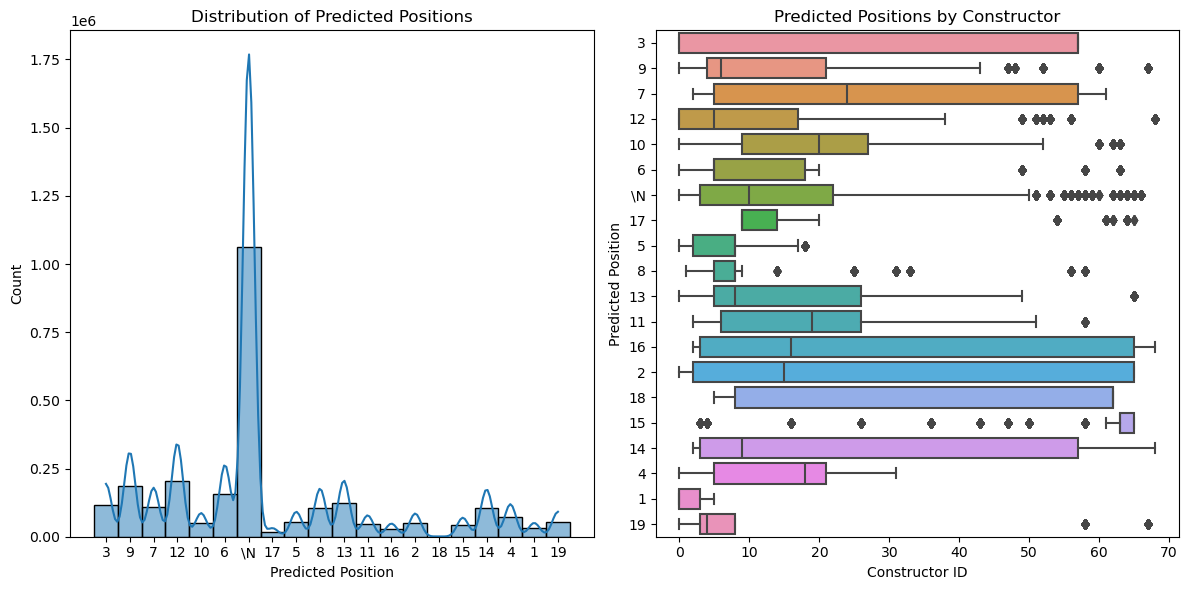

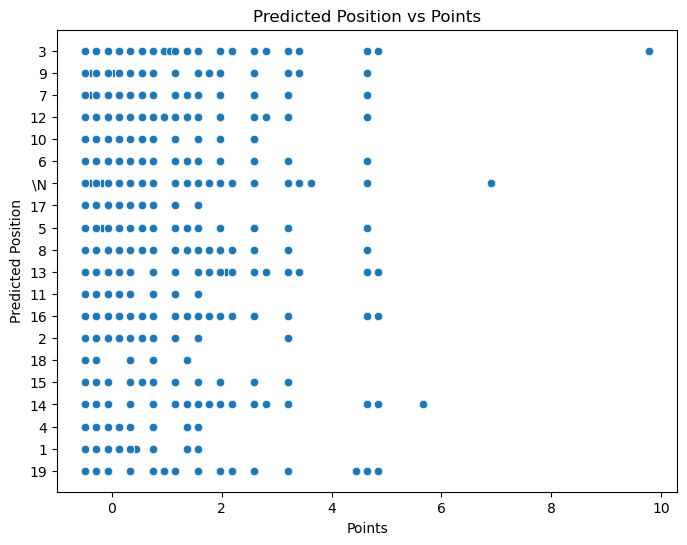

In [69]:
import seaborn as sns

merged_df = pd.merge(results, df, on='driverId')

plt.figure(figsize=(12, 6))

# Histogram of predicted positions
plt.subplot(1, 2, 1)
sns.histplot(merged_df['predicted_position'], bins=20, kde=True)
plt.title('Distribution of Predicted Positions')
plt.xlabel('Predicted Position')
plt.ylabel('Count')

# Box plot of predicted positions vs constructorId
plt.subplot(1, 2, 2)
sns.boxplot(x='constructorId', y='predicted_position', data=merged_df)
plt.title('Predicted Positions by Constructor')
plt.xlabel('Constructor ID')
plt.ylabel('Predicted Position')

plt.tight_layout()
plt.show()

# Scatter plot of predicted positions vs points
plt.figure(figsize=(8, 6))
sns.scatterplot(x='points', y='predicted_position', data=merged_df)
plt.title('Predicted Position vs Points')
plt.xlabel('Points')
plt.ylabel('Predicted Position')
plt.show()

In [70]:
import pandas as pd

# Assuming 'results' DataFrame contains driverId and predicted_position columns
# Convert predicted_position to numeric to handle '\N' values properly
results['predicted_position'] = pd.to_numeric(results['predicted_position'], errors='coerce')

# Drop rows where predicted_position is NaN (if necessary)
results.dropna(subset=['predicted_position'], inplace=True)

# Save to CSV with desired columns
result_csv = results[['predicted_position','driverId' ]]
result_csv.to_csv('predicted_positions.csv', index=False)

print(result_csv.head()) 


   predicted_position  driverId
0                 3.0         0
1                 3.0         0
2                 3.0         0
3                 3.0         0
4                 3.0         0


In [82]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you have the actual positions in a dataframe or array
actual_positions = df['position'].values  # Replace with your actual data source

# Drop the first 7,442 rows from actual_positions
actual_positions = actual_positions[7442:]

# Extract predicted positions from results DataFrame
predicted_positions = results['predicted_position'].values

# Print lengths for debugging
print(f"Length of actual_positions: {len(actual_positions)}")
print(f"Length of predicted_positions: {len(predicted_positions)}")

# Ensure only valid predictions are used
valid_indices = ~np.isnan(predicted_positions)

# Filter both actual_positions and predicted_positions
actual_positions = actual_positions[:len(predicted_positions)]
predicted_positions = predicted_positions[valid_indices]

# Print lengths after filtering NaNs
print(f"After filtering NaNs:")
print(f"Length of actual_positions: {len(actual_positions)}")
print(f"Length of predicted_positions: {len(predicted_positions)}")

# Handle NaNs in actual_positions or predicted_positions if present
actual_positions = np.nan_to_num(actual_positions, nan=np.nanmean(actual_positions))
predicted_positions = np.nan_to_num(predicted_positions, nan=np.nanmean(predicted_positions))

# Ensure both arrays have the same length after adjustments
if len(actual_positions) != len(predicted_positions):
    raise ValueError("Actual and predicted positions must have the same length.")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_positions, predicted_positions))

print(f"RMSE: {rmse:.2f}")


Length of actual_positions: 9879
Length of predicted_positions: 9879
After filtering NaNs:
Length of actual_positions: 9879
Length of predicted_positions: 9879
RMSE: 6.19
